In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 2 0 0 0 1 1 1 0 2 1 0 0 0 2]


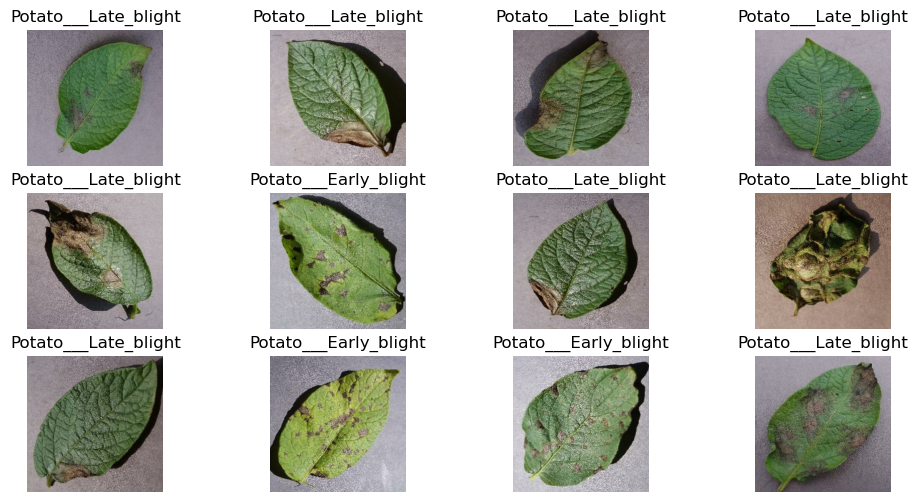

In [5]:
plt.figure(figsize=(12,6))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

- Training Data==>80%
- Testing Data==>10%
- Validation Data==>10%

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
print("Length of traing_ds is:{}\nLength of testing_ds is:{}\nLength of validation_ds is:{}\n ".format(len(train_ds),len(test_ds),len(val_ds)))

Length of traing_ds is:54
Length of testing_ds is:8
Length of validation_ds is:6
 


# Cache, Shuffle, and Prefetch the Dataset

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.6784314  0.67058825 0.72156864]
  [0.7137255  0.7058824  0.75686276]
  [0.5686275  0.56078434 0.6117647 ]
  ...
  [0.4862745  0.49411765 0.5411765 ]
  [0.52156866 0.5294118  0.5764706 ]
  [0.5803922  0.5882353  0.63529414]]

 [[0.7294118  0.72156864 0.77254903]
  [0.74509805 0.7372549  0.7882353 ]
  [0.6392157  0.6313726  0.68235296]
  ...
  [0.5372549  0.54509807 0.5921569 ]
  [0.5294118  0.5372549  0.58431375]
  [0.54901963 0.5568628  0.6039216 ]]

 [[0.5058824  0.49803922 0.54901963]
  [0.8352941  0.827451   0.8784314 ]
  [0.85882354 0.8509804  0.9019608 ]
  ...
  [0.5686275  0.5764706  0.62352943]
  [0.52156866 0.5294118  0.5764706 ]
  [0.5058824  0.5137255  0.56078434]]

 ...

 [[0.60784316 0.6        0.6509804 ]
  [0.59607846 0.5882353  0.6392157 ]
  [0.5921569  0.58431375 0.63529414]
  ...
  [0.44313726 0.43529412 0.4862745 ]
  [0.45490196 0.44705883 0.49803922]
  [0.45490196 0.44705883 0.49803922]]

 [[0.57254905 0.5647059  0.6156863 ]
  [0.5764706  0.5686275  0.61960787]


In [11]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_11 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 60, 60, 64)         

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 184s 3s/step - loss: 0.8601 - accuracy: 0.5330 - val_loss: 0.9360 - val_accuracy: 0.5156
Epoch 2/50
54/54 [==============================] - 170s 3s/step - loss: 0.5194 - accuracy: 0.7772 - val_loss: 0.2943 - val_accuracy: 0.8698
Epoch 3/50
54/54 [==============================] - 173s 3s/step - loss: 0.2488 - accuracy: 0.8987 - val_loss: 0.2289 - val_accuracy: 0.9062
Epoch 4/50
54/54 [==============================] - 171s 3s/step - loss: 0.2283 - accuracy: 0.9097 - val_loss: 0.1433 - val_accuracy: 0.9531
Epoch 5/50
54/54 [==============================] - 170s 3s/step - loss: 0.1283 - accuracy: 0.9450 - val_loss: 0.1463 - val_accuracy: 0.9479
Epoch 6/50
54/54 [==============================] - 179s 3s/step - loss: 0.1315 - accuracy: 0.9514 - val_loss: 0.1792 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 172s 3s/step - loss: 0.1052 - accuracy: 0.9595 - val_loss: 0.0830 - val_accuracy: 0.9635
Epoch 8/50
54

In [24]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 549ms/step - loss: 1.6250e-04 - accuracy: 1.0000


In [25]:
scores

[0.00016249972395598888, 1.0]

In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
type(history.history['loss'])


list

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.8601241111755371,
 0.5194201469421387,
 0.24880485236644745,
 0.22827240824699402,
 0.12831437587738037]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

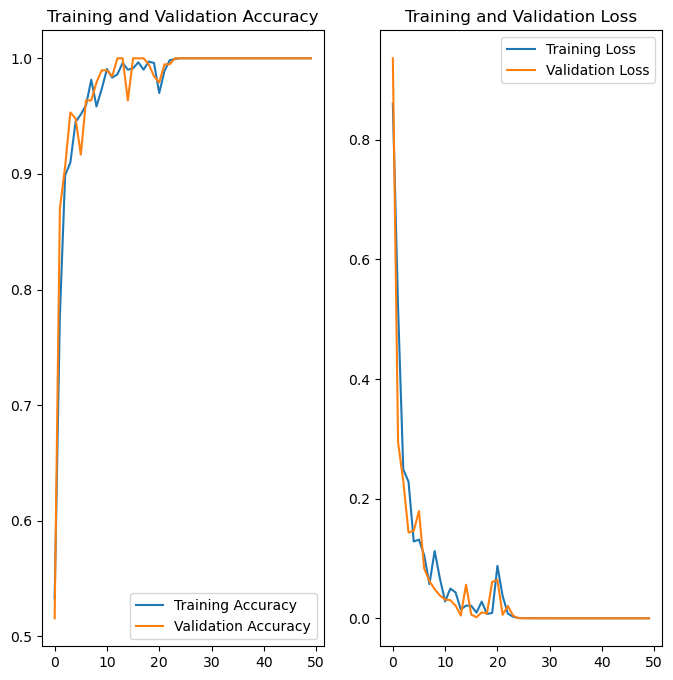

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 833ms/step
predicted label: Potato___healthy


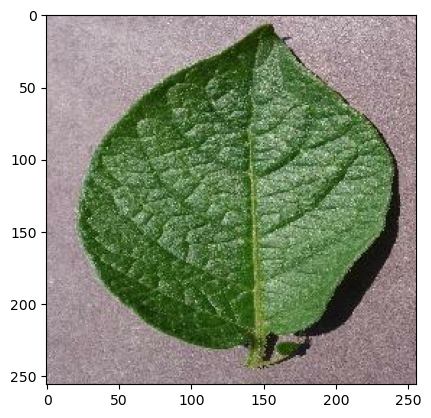

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 44ms/step


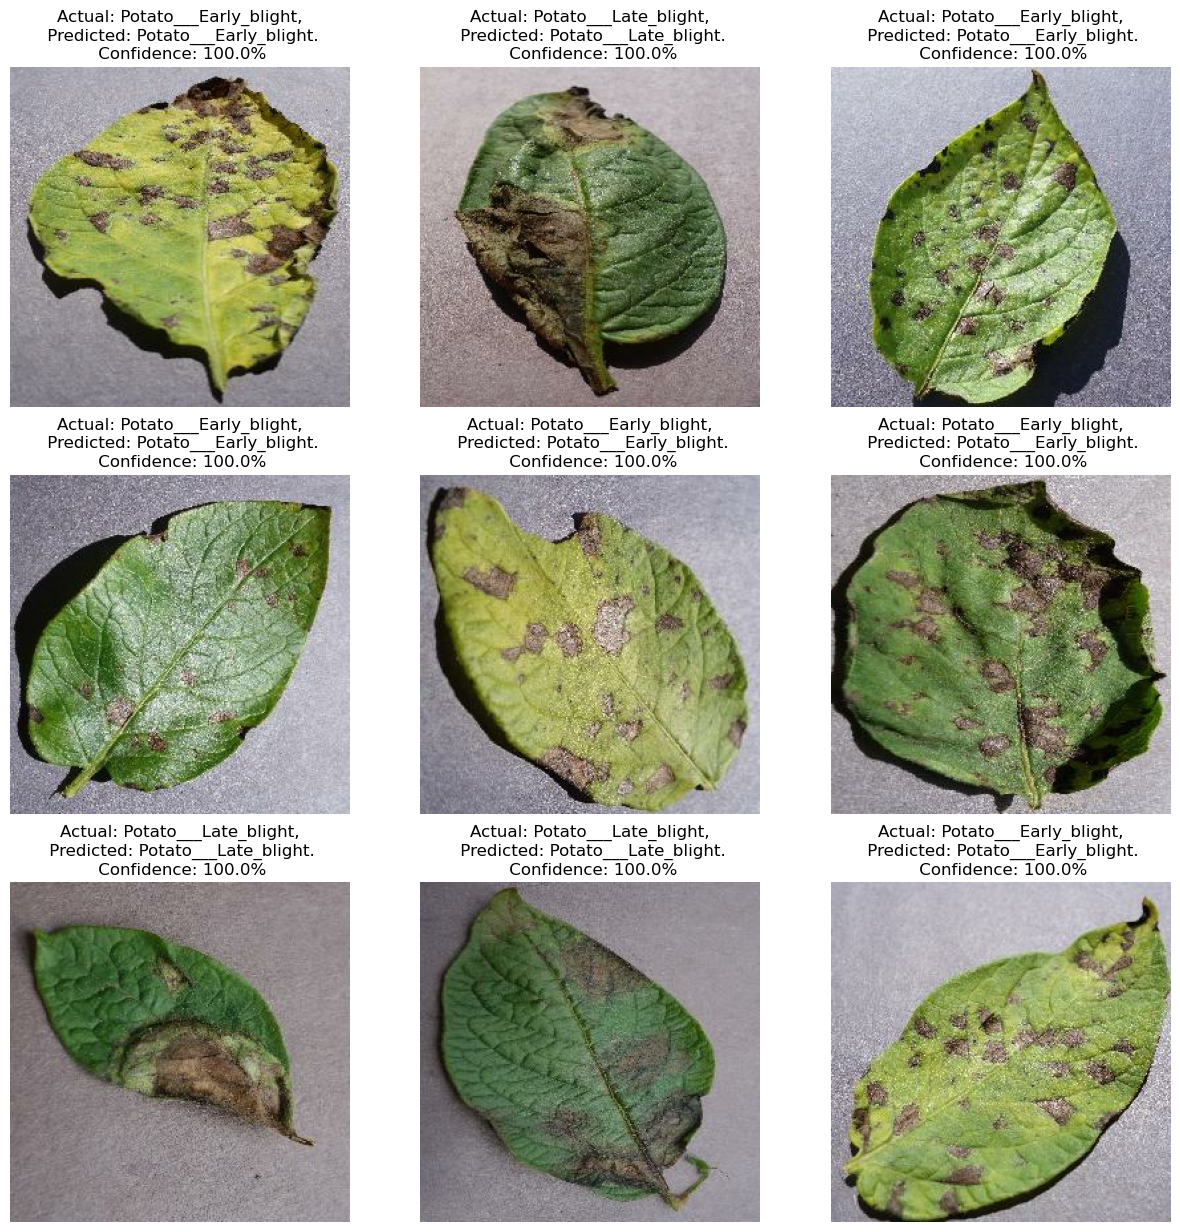

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [35]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
